# CNN Visualization
Convolution + Feature Maps (Version 1)
What you will SEE

Left → Input image

Middle → Convolution filter sliding (highlighted window)

Right → Feature map being filled progressively


## FULL WORKING CODE — CNN CONVOLUTION ANIMATION

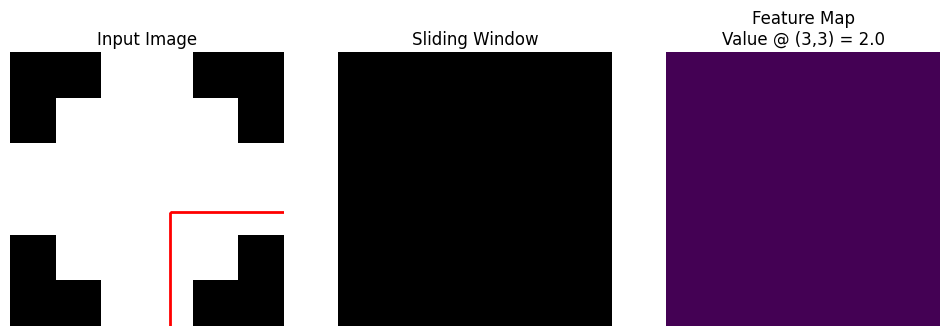

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

# --------------------------------------------------
# Setup
# --------------------------------------------------
os.makedirs("gifs", exist_ok=True)
np.random.seed(0)

# --------------------------------------------------
# Input image (simple synthetic pattern)
# --------------------------------------------------
image = np.array([
    [0,0,1,1,0,0],
    [0,1,1,1,1,0],
    [1,1,1,1,1,1],
    [1,1,1,1,1,1],
    [0,1,1,1,1,0],
    [0,0,1,1,0,0]
], dtype=float)

H, W = image.shape

# --------------------------------------------------
# Convolution filter (edge detector)
# --------------------------------------------------
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

k = kernel.shape[0]

# Output feature map size
out_h = H - k + 1
out_w = W - k + 1
feature_map = np.zeros((out_h, out_w))

# --------------------------------------------------
# Precompute convolution steps
# --------------------------------------------------
steps = []
for i in range(out_h):
    for j in range(out_w):
        patch = image[i:i+k, j:j+k]
        value = np.sum(patch * kernel)
        steps.append((i, j, patch.copy(), value))

# --------------------------------------------------
# Plot layout
# --------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax_img, ax_patch, ax_feat = axes

# Input image
img_plot = ax_img.imshow(image, cmap="gray")
ax_img.set_title("Input Image")
ax_img.axis("off")

# Patch view
patch_plot = ax_patch.imshow(np.zeros((k, k)), cmap="gray")
ax_patch.set_title("Sliding Window")
ax_patch.axis("off")

# Feature map
feat_plot = ax_feat.imshow(feature_map, cmap="viridis")
ax_feat.set_title("Feature Map")
ax_feat.axis("off")

# Sliding window rectangle
rect = Rectangle((0,0), k, k, edgecolor="red", facecolor="none", lw=2)
ax_img.add_patch(rect)

# --------------------------------------------------
# Animation functions
# --------------------------------------------------
def init():
    feat_plot.set_data(np.zeros_like(feature_map))
    patch_plot.set_data(np.zeros((k, k)))
    rect.set_xy((0, 0))
    return [patch_plot, feat_plot, rect]

def update(frame):
    i, j, patch, value = steps[frame]

    # Update sliding window
    rect.set_xy((j, i))

    # Update patch visualization
    patch_plot.set_data(patch)

    # Update feature map progressively
    fm = feature_map.copy()
    fm[i, j] = value
    feat_plot.set_data(fm)

    ax_feat.set_title(f"Feature Map\nValue @ ({i},{j}) = {value:.1f}")
    return [patch_plot, feat_plot, rect]

# --------------------------------------------------
# Animation (SAFE CONFIG)
# --------------------------------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=len(steps),
    init_func=init,
    interval=500,
    blit=False
)

# 🔥 FORCE FIRST FRAME (CRITICAL FOR GIF SAVE)
init()
update(0)
fig.canvas.draw()

# Save GIF
ani.save("gifs/cnn_convolution.gif", writer="pillow")

plt.show()
